<a href="https://www.kaggle.com/code/lalit7881/t20-wc-2026-analysis-dataset-acc-72-32?scriptVersionId=297154124" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/t20-world-cup-2026-ai-prediction-and-analysis/world_cup_last_30_years.csv


## Title:
T20 WC 2026 Analysis Dataset

## Description:
This dataset provides comprehensive insights and predictive analysis for the T20 World Cup 2026. It includes historical team performance, player statistics, match outcomes, pitch conditions, and other relevant features to enable data-driven predictions. Analysts, sports enthusiasts, and data scientists can use this dataset for trend analysis, performance forecasting, and machine learning modeling to estimate match results, player impact, and team probabilities. The dataset is structured to support easy exploration, visualization, and predictive modeling, helping users uncover patterns and make informed decisions about the tournament.

## Import dataset

In [2]:
df = pd.read_csv("/kaggle/input/t20-world-cup-2026-ai-prediction-and-analysis/world_cup_last_30_years.csv")

In [3]:
df.head()

,match_id,date,season,tournament_name,is_worldcup,match_stage,team1,team2,venue,city,...,second_innings_score,match_result,elo_team1,elo_team2,elo_diff,team1_form_5,team2_form_5,team1_form_10,team2_form_10,h2h_win_pct
0,7129582838,2014-03-16,2014,World T20,True,First Round,Hong Kong,Nepal,Zahur Ahmed Chowdhury Stadium,Chittagong,...,69.0,completed,1500.0,1500.0,0.0,0.5,0.5,0.5,0.5,0.5
1,-292451440,2014-03-17,2014,World T20,True,First Round,Ireland,Zimbabwe,Sylhet Stadium,NaN,...,164.0,completed,1500.0,1500.0,0.0,0.5,0.5,0.5,0.5,0.5
2,-339384486,2014-03-17,2014,World T20,True,First Round,Netherlands,United Arab Emirates,Sylhet Stadium,NaN,...,152.0,completed,1500.0,1500.0,0.0,0.5,0.5,0.5,0.5,0.5
3,-901852254,2014-03-18,2014,World T20,True,First Round,Bangladesh,Nepal,Zahur Ahmed Chowdhury Stadium,Chittagong,...,132.0,completed,1500.0,1516.0,-16.0,0.5,1.0,0.5,1.0,0.5
4,6647625351,2014-03-19,2014,World T20,True,First Round,Ireland,United Arab Emirates,Sylhet Stadium,NaN,...,103.0,completed,1516.0,1484.0,32.0,1.0,0.0,1.0,0.0,0.5


In [4]:
df.tail()

,match_id,date,season,tournament_name,is_worldcup,match_stage,team1,team2,venue,city,...,second_innings_score,match_result,elo_team1,elo_team2,elo_diff,team1_form_5,team2_form_5,team1_form_10,team2_form_10,h2h_win_pct
3860,-573734323,2026-02-08,2026,ICC Men's T20 World Cup,True,NaN,Sri Lanka,Ireland,"R Premadasa Stadium, Colombo",Colombo,...,143.0,completed,1616.756804,1748.327586,-131.570782,0.2,0.8,0.1,0.70,0.800000
3861,-721131165,2026-02-09,2026,ICC Men's T20 World Cup,True,NaN,Scotland,Italy,"Eden Gardens, Kolkata",Kolkata,...,134.0,completed,1709.541878,1657.008977,52.532902,0.6,0.4,0.5,0.30,0.666667
3862,-271589407,2026-02-09,2026,ICC Men's T20 World Cup,True,NaN,Oman,Zimbabwe,"Sinhalese Sports Club Ground, Colombo",Colombo,...,106.0,completed,1703.887632,1588.442501,115.445131,0.8,0.0,0.8,0.10,0.500000
3863,-214583908,2026-02-09,2026,ICC Men's T20 World Cup,True,NaN,South Africa,Canada,"Narendra Modi Stadium, Ahmedabad",Ahmedabad,...,156.0,completed,1696.459323,1604.740273,91.719050,0.4,0.3,0.5,0.35,0.500000
3864,-792869598,2026-02-09,2026,Oman Women tour of Qatar,False,NaN,Oman,Qatar,"West End Park International Cricket Stadium, Doha",Doha,...,143.0,completed,1682.758576,1494.982807,187.775770,0.8,0.4,0.8,0.40,0.857143


In [5]:
df.shape

(3865, 38)

In [6]:
df.describe()

,match_id,season,innings1_runs,innings1_wkts,innings1_overs,innings2_runs,innings2_wkts,innings2_overs,year,month,first_innings_score,second_innings_score,elo_team1,elo_team2,elo_diff,team1_form_5,team2_form_5,team1_form_10,team2_form_10,h2h_win_pct
count,3.865000e+03,3865.000000,3865.000000,3865.000000,3865.000000,3803.000000,3803.000000,3803.000000,3865.000000,3865.000000,3865.000000,3865.000000,3865.000000,3865.000000,3865.000000,3865.000000,3865.000000,3865.000000,3865.000000,3865.000000
mean,2.210774e+09,2022.988616,133.809056,6.855369,20.356429,109.541941,5.911123,17.480358,2022.988616,7.258991,133.809056,107.784735,1546.030742,1541.672471,4.358271,0.507887,0.494278,0.504235,0.497533,0.508099
std,3.304155e+09,2.126164,46.453880,2.367184,2.681439,40.728867,3.208269,4.461129,2.126164,3.135639,46.453880,42.681057,111.384432,112.102363,115.397411,0.285397,0.279678,0.233727,0.229345,0.316264
min,-9.998677e+08,2014.000000,2.000000,0.000000,0.300000,1.000000,0.000000,0.300000,2014.000000,1.000000,2.000000,0.000000,1218.591733,1233.624941,-428.186768,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-5.361981e+08,2022.000000,103.000000,5.000000,20.300000,81.000000,3.000000,15.500000,2022.000000,5.000000,103.000000,79.000000,1470.558442,1466.511245,-68.847296,0.300000,0.300000,0.350000,0.350000,0.333333
50%,-1.313551e+08,2024.000000,134.000000,7.000000,20.800000,109.000000,6.000000,19.300000,2024.000000,7.000000,134.000000,108.000000,1538.480161,1533.965250,2.429835,0.500000,0.500000,0.500000,0.500000,0.500000
75%,5.033107e+09,2025.000000,165.000000,9.000000,21.300000,138.000000,9.000000,20.700000,2025.000000,10.000000,165.000000,138.000000,1614.890896,1608.018060,78.410931,0.800000,0.700000,0.700000,0.700000,0.714286
max,9.994627e+09,2026.000000,344.000000,10.000000,31.700000,259.000000,11.000000,27.300000,2026.000000,12.000000,344.000000,259.000000,1972.224542,1976.615208,438.075988,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.dtypes

match_id                  int64
date                     object
season                    int64
tournament_name          object
is_worldcup                bool
match_stage              object
team1                    object
team2                    object
venue                    object
city                     object
toss_winner              object
toss_decision            object
winner                   object
result_type              object
format                   object
innings1_team            object
innings1_runs             int64
innings1_wkts             int64
innings1_overs          float64
innings2_team            object
innings2_runs           float64
innings2_wkts           float64
innings2_overs          float64
year                      int64
month                     int64
batting_first            object
chasing_team             object
first_innings_score       int64
second_innings_score    float64
match_result             object
elo_team1               float64
elo_team

In [8]:
df.shape

(3865, 38)

In [9]:
df.isnull().sum()

match_id                   0
date                       0
season                     0
tournament_name            0
is_worldcup                0
match_stage             3499
team1                      0
team2                      0
venue                      0
city                      32
toss_winner                0
toss_decision              0
winner                   104
result_type                0
format                     0
innings1_team              0
innings1_runs              0
innings1_wkts              0
innings1_overs             0
innings2_team             62
innings2_runs             62
innings2_wkts             62
innings2_overs            62
year                       0
month                      0
batting_first              0
chasing_team               0
first_innings_score        0
second_innings_score       0
match_result               0
elo_team1                  0
elo_team2                  0
elo_diff                   0
team1_form_5               0
team2_form_5  

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.nunique()

match_id                3865
date                    1381
season                    11
tournament_name          452
is_worldcup                2
match_stage               21
team1                    106
team2                    105
venue                    321
city                     208
toss_winner              106
toss_decision              2
winner                   100
result_type                3
format                     1
innings1_team            106
innings1_runs            260
innings1_wkts             11
innings1_overs           149
innings2_team            105
innings2_runs            218
innings2_wkts             12
innings2_overs           149
year                      11
month                     12
batting_first            106
chasing_team             105
first_innings_score      260
second_innings_score     219
match_result               3
elo_team1               3786
elo_team2               3780
elo_diff                3821
team1_form_5              19
team2_form_5  

In [12]:
df.columns

Index(['match_id', 'date', 'season', 'tournament_name', 'is_worldcup',
       'match_stage', 'team1', 'team2', 'venue', 'city', 'toss_winner',
       'toss_decision', 'winner', 'result_type', 'format', 'innings1_team',
       'innings1_runs', 'innings1_wkts', 'innings1_overs', 'innings2_team',
       'innings2_runs', 'innings2_wkts', 'innings2_overs', 'year', 'month',
       'batting_first', 'chasing_team', 'first_innings_score',
       'second_innings_score', 'match_result', 'elo_team1', 'elo_team2',
       'elo_diff', 'team1_form_5', 'team2_form_5', 'team1_form_10',
       'team2_form_10', 'h2h_win_pct'],
      dtype='object')

## Data visualizations

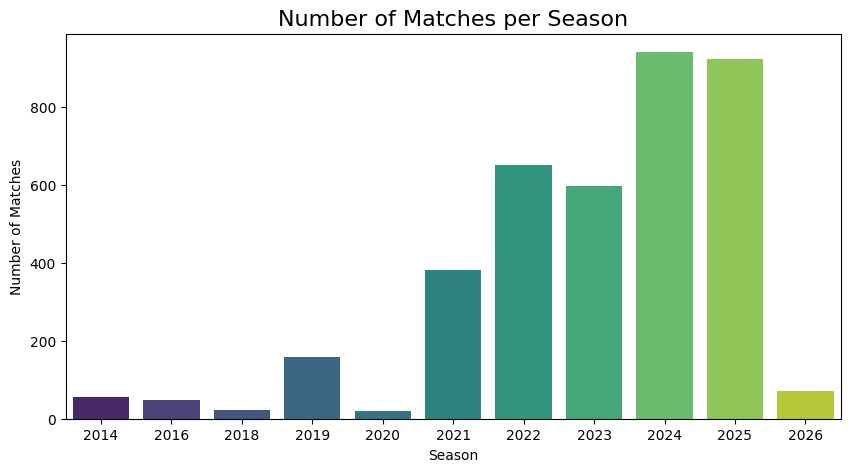

In [13]:
plt.figure(figsize=(10,5))
season_counts = df['season'].value_counts().sort_index()
sns.barplot(x=season_counts.index, y=season_counts.values, palette="viridis")
plt.title("Number of Matches per Season", fontsize=16)
plt.xlabel("Season")
plt.ylabel("Number of Matches")
plt.show()

<Figure size 1000x500 with 0 Axes>

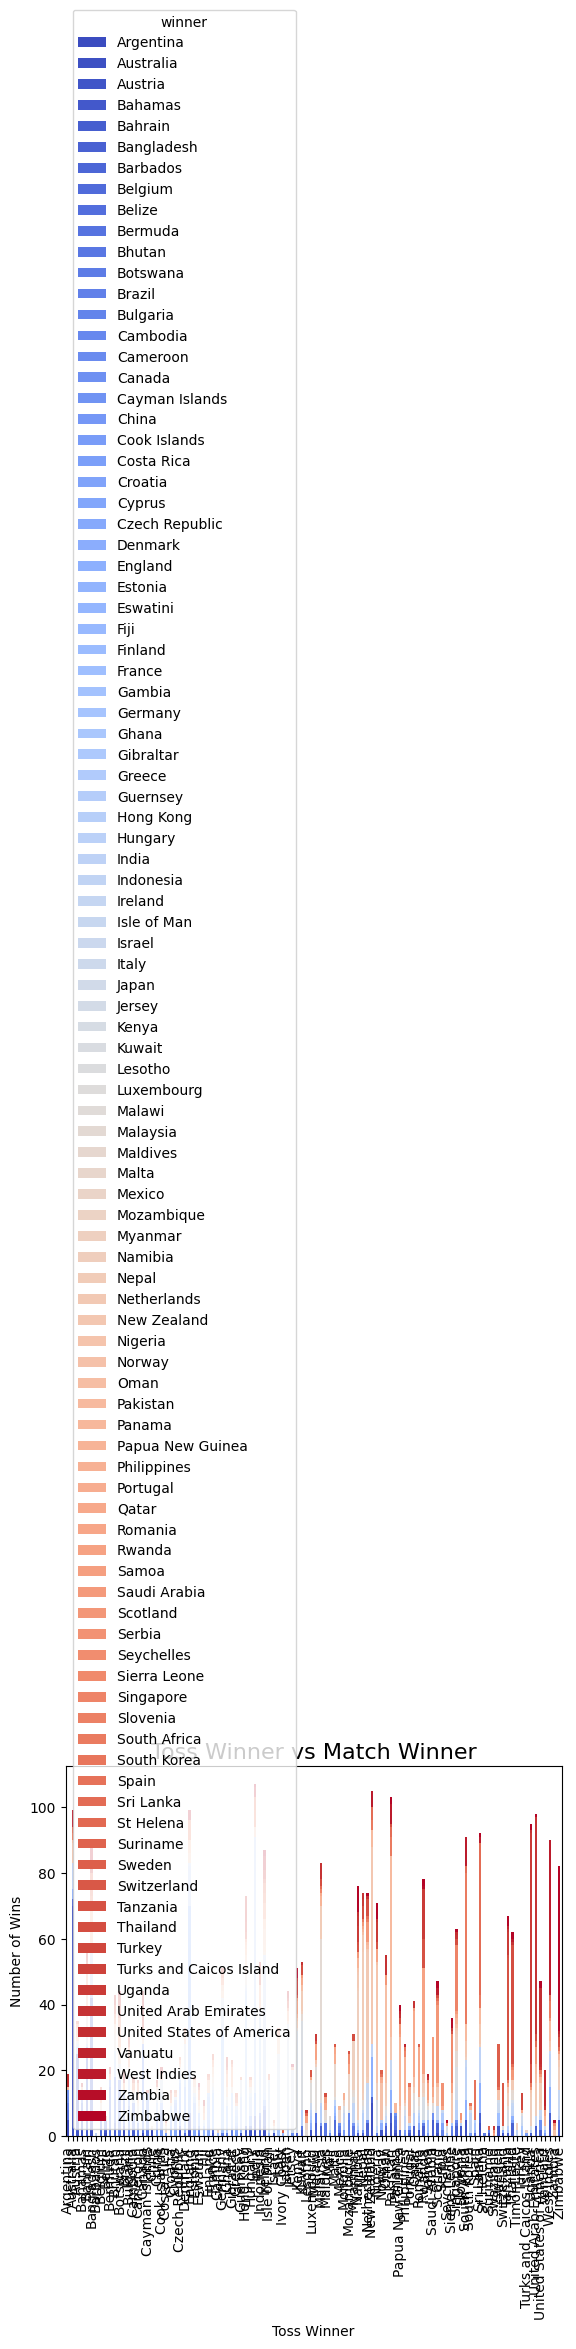

In [14]:
plt.figure(figsize=(10,5))
toss_win_match_win = pd.crosstab(df['toss_winner'], df['winner'])
toss_win_match_win.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title("Toss Winner vs Match Winner", fontsize=16)
plt.xlabel("Toss Winner")
plt.ylabel("Number of Wins")
plt.show()

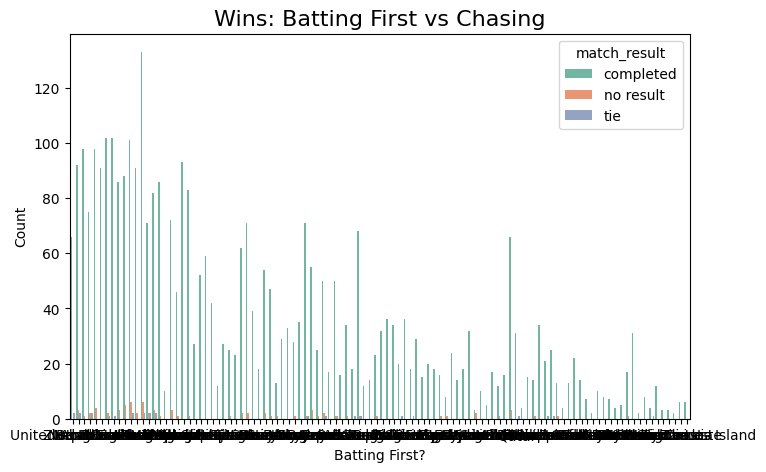

In [15]:
plt.figure(figsize=(8,5))
sns.countplot(x='batting_first', hue='match_result', data=df, palette='Set2')
plt.title("Wins: Batting First vs Chasing", fontsize=16)
plt.xlabel("Batting First?")
plt.ylabel("Count")
plt.show()


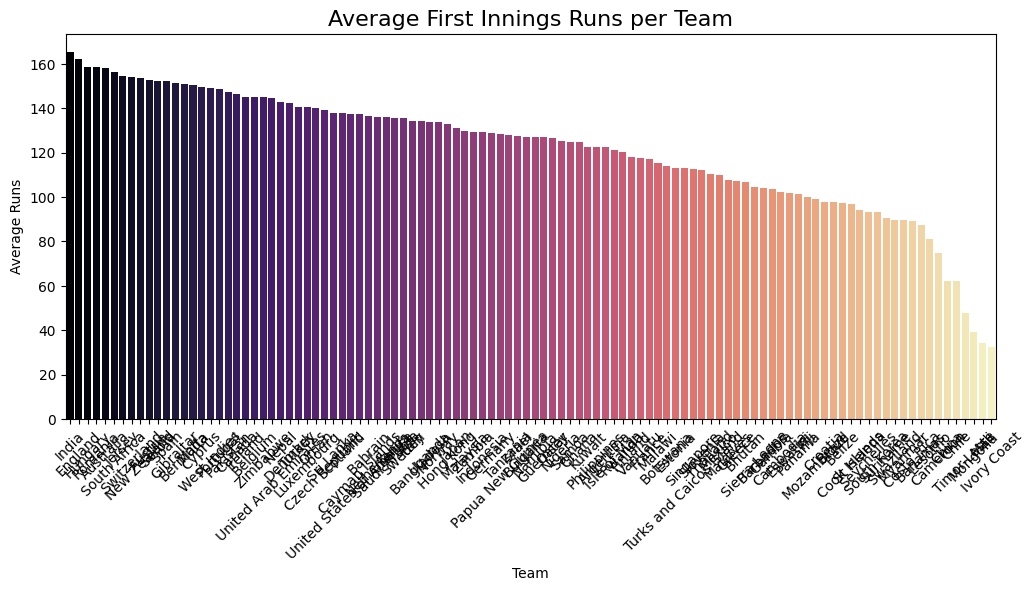

In [16]:
team_avg_runs = df.groupby('team1')['innings1_runs'].mean().sort_values(ascending=False)
plt.figure(figsize=(12,5))
sns.barplot(x=team_avg_runs.index, y=team_avg_runs.values, palette='magma')
plt.xticks(rotation=45)
plt.title("Average First Innings Runs per Team", fontsize=16)
plt.xlabel("Team")
plt.ylabel("Average Runs")
plt.show()

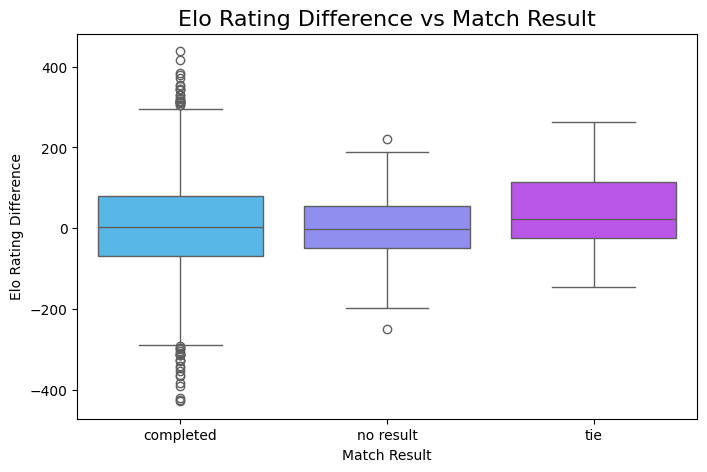

In [17]:
plt.figure(figsize=(8,5))
sns.boxplot(x='match_result', y='elo_diff', data=df, palette='cool')
plt.title("Elo Rating Difference vs Match Result", fontsize=16)
plt.xlabel("Match Result")
plt.ylabel("Elo Rating Difference")
plt.show()

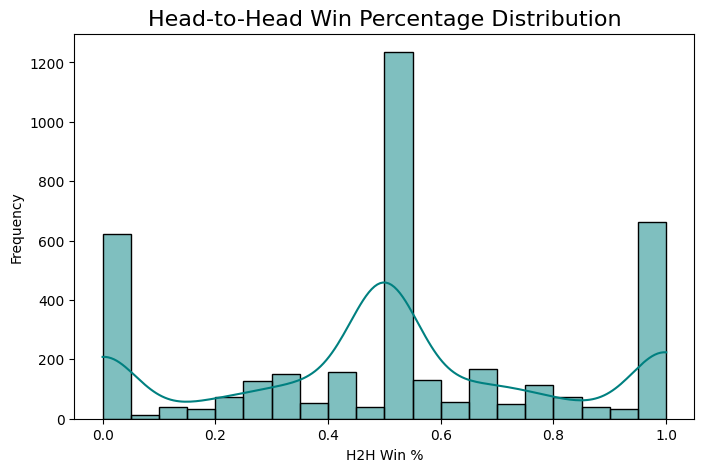

In [18]:
plt.figure(figsize=(8,5))
sns.histplot(df['h2h_win_pct'], bins=20, kde=True, color='teal')
plt.title("Head-to-Head Win Percentage Distribution", fontsize=16)
plt.xlabel("H2H Win %")
plt.ylabel("Frequency")
plt.show()

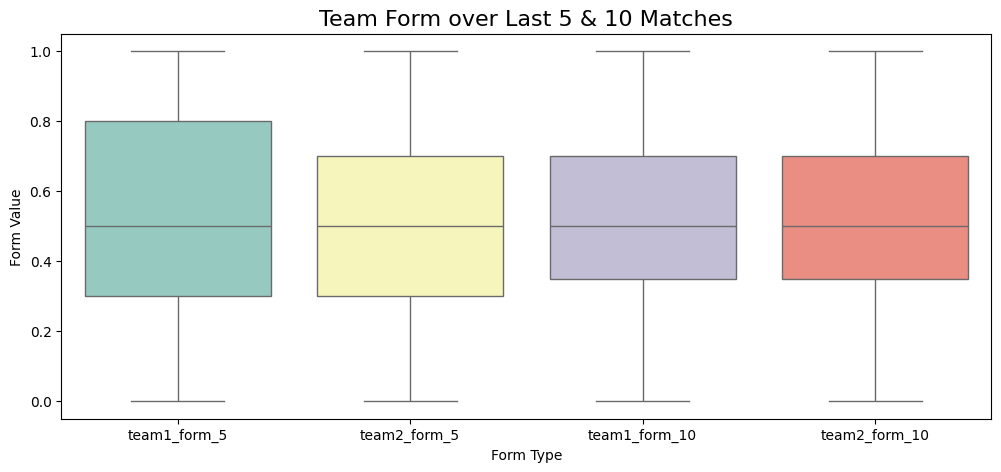

In [19]:
plt.figure(figsize=(12,5))
df_melted = df.melt(id_vars=['match_id'], value_vars=['team1_form_5','team2_form_5','team1_form_10','team2_form_10'],
                    var_name='Form_Type', value_name='Form_Value')
sns.boxplot(x='Form_Type', y='Form_Value', data=df_melted, palette='Set3')
plt.title("Team Form over Last 5 & 10 Matches", fontsize=16)
plt.xlabel("Form Type")
plt.ylabel("Form Value")
plt.show()

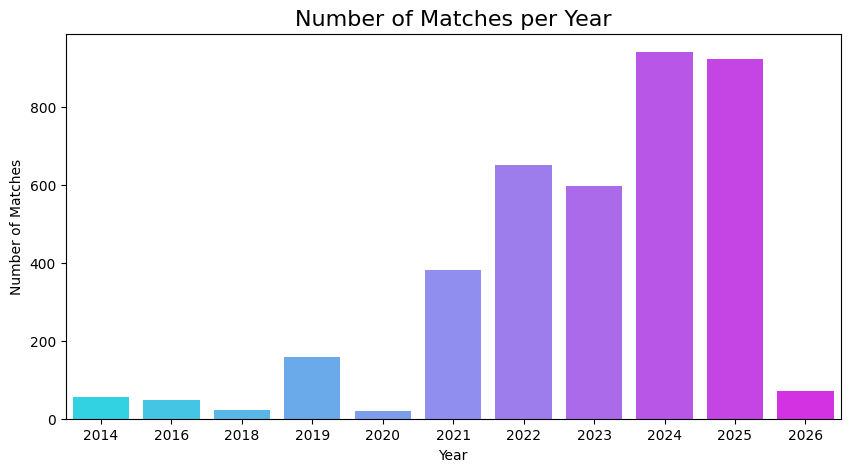

In [20]:
plt.figure(figsize=(10,5))
year_counts = df['year'].value_counts().sort_index()
sns.barplot(x=year_counts.index, y=year_counts.values, palette='cool')
plt.title("Number of Matches per Year", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Number of Matches")
plt.show()

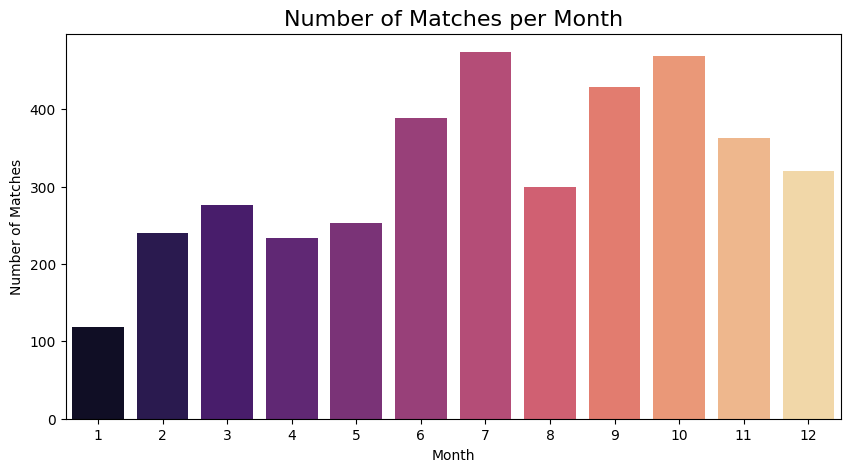

In [21]:
plt.figure(figsize=(10,5))
month_counts = df['month'].value_counts().sort_index()
sns.barplot(x=month_counts.index, y=month_counts.values, palette='magma')
plt.title("Number of Matches per Month", fontsize=16)
plt.xlabel("Month")
plt.ylabel("Number of Matches")
plt.show()

## Feature engg

In [22]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [23]:
print("Missing values per column:")
print(df.isnull().sum())
print("\nDuplicates:", df.duplicated().sum())
print("\nData types:\n", df.dtypes)
print("\nDataset Shape:", df.shape)

Missing values per column:
match_id                   0
date                       0
season                     0
tournament_name            0
is_worldcup                0
match_stage             3499
team1                      0
team2                      0
venue                      0
city                      32
toss_winner                0
toss_decision              0
winner                   104
result_type                0
format                     0
innings1_team              0
innings1_runs              0
innings1_wkts              0
innings1_overs             0
innings2_team             62
innings2_runs             62
innings2_wkts             62
innings2_overs            62
year                       0
month                      0
batting_first              0
chasing_team               0
first_innings_score        0
second_innings_score       0
match_result               0
elo_team1                  0
elo_team2                  0
elo_diff                   0
team1_form_5    

In [24]:
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(include='object').columns

for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [25]:
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [26]:
X = df.drop(['match_id', 'winner'], axis=1)
y = df['winner']

In [27]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    random_state=42
)


In [29]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=200, random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"--- {name} ---")
    print("Accuracy:", round(acc*100,2), "%")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\n")

--- Logistic Regression ---
Accuracy: 22.64 %
              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       0.38      0.57      0.45        21
           2       0.33      0.44      0.38         9
           4       0.12      0.11      0.12        18
           5       0.36      0.62      0.45        16
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         9
          12       0.40      1.00      0.57         2
          13       0.33      1.00      0.50         2
          14       1.00      1.00      1.00         2
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         5
          17       0.00      0.00      0.00         0
          18       0.50      0.67  

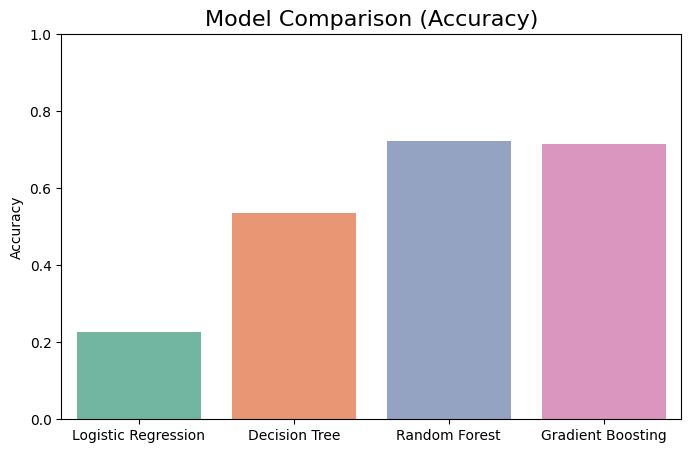

In [30]:
plt.figure(figsize=(8,5))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette="Set2")
plt.title("Model Comparison (Accuracy)", fontsize=16)
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.show()

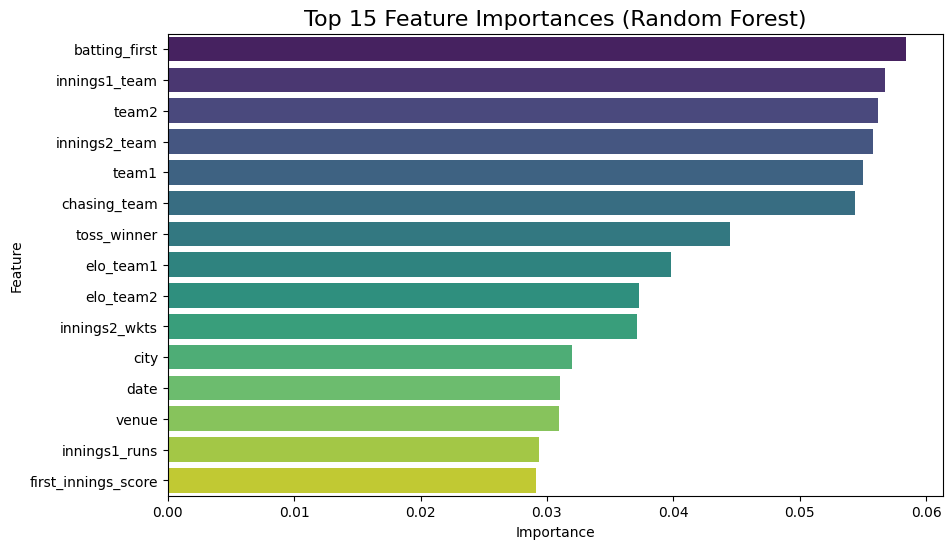

In [31]:
rf_model = models['Random Forest']
importances = rf_model.feature_importances_
feature_names = X.columns

feat_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False).head(15)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp, palette='viridis')
plt.title("Top 15 Feature Importances (Random Forest)", fontsize=16)
plt.show()

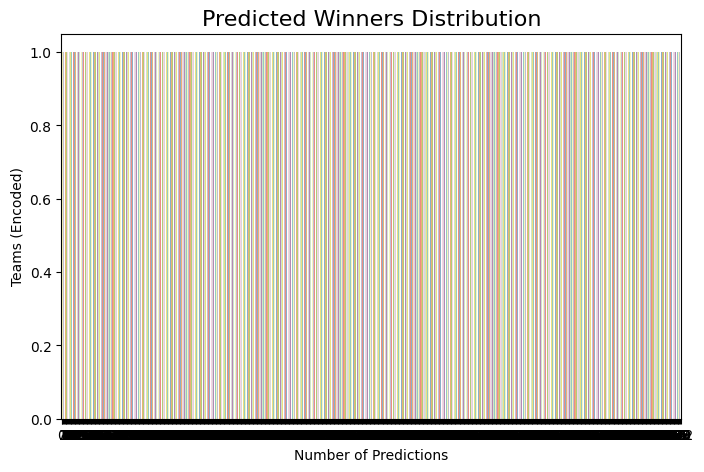

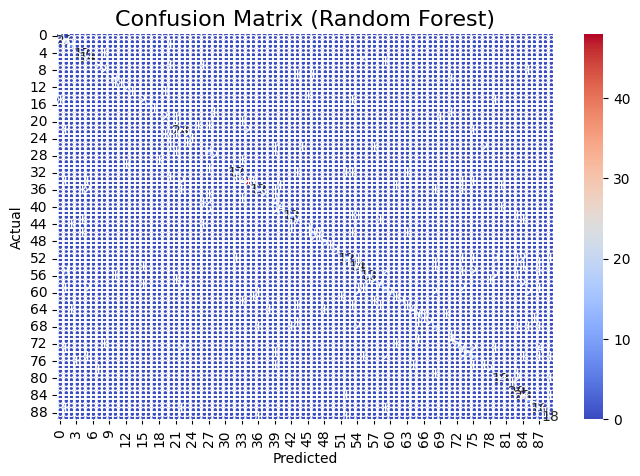

In [32]:
y_pred = rf_model.predict(X_test)

plt.figure(figsize=(8,5))
sns.countplot(y_pred, palette="Set3")
plt.title("Predicted Winners Distribution", fontsize=16)
plt.xlabel("Number of Predictions")
plt.ylabel("Teams (Encoded)")
plt.show()

plt.figure(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='coolwarm')
plt.title("Confusion Matrix (Random Forest)", fontsize=16)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Thank you..pls upvote!!!!